In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-71.76743059265631 131.47710766639875
-43.73575727640701 171.21640633809903
48.17907649567883 -166.53291336963562
72.03469821878184 -63.64250637077214
17.850373727538667 130.88199100242144
11.665817461057372 -117.47662276622297
50.46737876548903 158.52572773503857
8.241790513805654 38.82914938491231
36.048592958183434 79.66381367736602
-15.587885189573512 18.641792594762393
-4.25649424784244 -105.00260634604078
-19.132543320326292 119.6117225524543
10.792077883646215 10.849177358579368
4.266689334186708 88.50283499830238
-24.29983594945699 155.52951067648672
-31.919975873637277 -69.06046665803233
-68.15896400775428 -31.28135570842457
76.85944340733283 38.64232853299268
52.07305363095992 38.689068656515815
14.137202538956089 11.69615366177672
8.524088114898646 76.34656672736486
31.853093642064906 114.87641303678834
-76.27565948632848 -126.8731326572968
-45.4899559338752 163.54339851323715
68.01408795001157 -141.2017145883157
-56.419885648104724 41.12573038593197
75.87176642571254 37.184

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | methven
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | gigmoto
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | ozernovskiy
Processing Record 8 of Set 1 | ziway
Processing Record 9 of Set 1 | leh
Processing Record 10 of Set 1 | menongue
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | port hedland
Processing Record 13 of Set 1 | duku
Processing Record 14 of Set 1 | banda aceh
Processing Record 15 of Set 1 | hervey bay
Processing Record 16 of Set 1 | san juan
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 1 | gremyachye
City not found. Skipping...
Processing Record 20 of Set 1 | maine-soroa
Processing Record 21 of Set 1 | varkkallai
Processing Record 22 of Set 1 | huangchuan
Processing Record 23 of Set 1 | 

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,48.42,96,100,2.53,AU,2022-07-23 22:10:02
1,Methven,-43.6333,171.6500,37.02,94,100,1.01,NZ,2022-07-23 22:10:03
2,Bethel,41.3712,-73.4140,95.54,46,0,6.91,US,2022-07-23 22:10:03
3,Clyde River,70.4692,-68.5914,55.63,67,20,6.91,CA,2022-07-23 22:10:03
4,Gigmoto,13.7796,124.3900,82.24,84,89,5.77,PH,2022-07-23 22:10:04
5,Cabo San Lucas,22.8909,-109.9124,81.09,71,91,4.63,MX,2022-07-23 22:06:22
6,Ozernovskiy,51.5000,156.5167,55.87,86,57,2.33,RU,2022-07-23 22:10:04
7,Ziway,7.9333,38.7167,66.33,66,72,13.44,ET,2022-07-23 22:10:04
8,Leh,34.1667,77.5833,65.46,54,100,5.55,IN,2022-07-23 22:10:05
9,Menongue,-14.6585,17.6910,54.95,44,49,2.91,AO,2022-07-23 22:10:05


In [42]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-07-23 22:10:02,-42.7826,147.0587,48.42,96,100,2.53
1,Methven,NZ,2022-07-23 22:10:03,-43.6333,171.6500,37.02,94,100,1.01
2,Bethel,US,2022-07-23 22:10:03,41.3712,-73.4140,95.54,46,0,6.91
3,Clyde River,CA,2022-07-23 22:10:03,70.4692,-68.5914,55.63,67,20,6.91
4,Gigmoto,PH,2022-07-23 22:10:04,13.7796,124.3900,82.24,84,89,5.77
5,Cabo San Lucas,MX,2022-07-23 22:06:22,22.8909,-109.9124,81.09,71,91,4.63
6,Ozernovskiy,RU,2022-07-23 22:10:04,51.5000,156.5167,55.87,86,57,2.33
7,Ziway,ET,2022-07-23 22:10:04,7.9333,38.7167,66.33,66,72,13.44
8,Leh,IN,2022-07-23 22:10:05,34.1667,77.5833,65.46,54,100,5.55
9,Menongue,AO,2022-07-23 22:10:05,-14.6585,17.6910,54.95,44,49,2.91


In [43]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

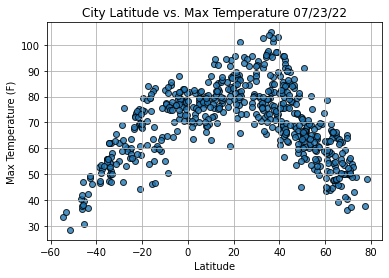

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

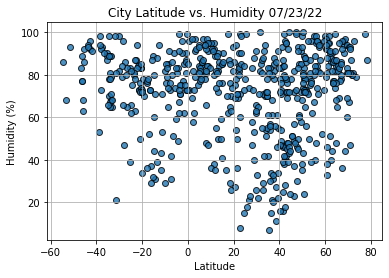

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

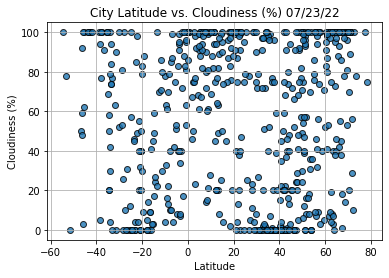

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

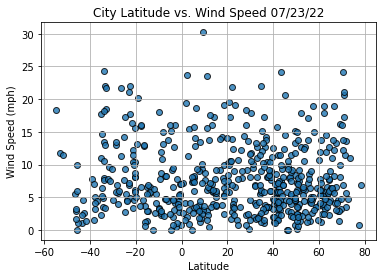

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                   Banda Aceh
Country                        ID
Date          2022-07-23 22:10:07
Lat                        5.5577
Lng                       95.3222
Max Temp                    77.67
Humidity                       84
Cloudiness                    100
Wind Speed                    3.4
Name: 13, dtype: object

In [28]:

city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
565    False
566    False
567     True
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bethel,US,2022-07-23 22:10:03,41.3712,-73.4140,95.54,46,0,6.91
3,Clyde River,CA,2022-07-23 22:10:03,70.4692,-68.5914,55.63,67,20,6.91
4,Gigmoto,PH,2022-07-23 22:10:04,13.7796,124.3900,82.24,84,89,5.77
5,Cabo San Lucas,MX,2022-07-23 22:06:22,22.8909,-109.9124,81.09,71,91,4.63
6,Ozernovskiy,RU,2022-07-23 22:10:04,51.5000,156.5167,55.87,86,57,2.33
...,...,...,...,...,...,...,...,...,...
563,Gao,ML,2022-07-23 22:25:03,16.6362,1.6370,94.62,35,45,13.87
564,Abu Dhabi,AE,2022-07-23 22:24:57,24.4667,54.3667,92.98,73,75,0.72
567,Villeneuve-Sur-Lot,FR,2022-07-23 22:25:04,44.5000,0.6667,68.94,44,3,6.85
568,Severo-Yeniseyskiy,RU,2022-07-23 22:25:04,60.3725,93.0408,44.92,94,83,6.04


In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bethel,US,2022-07-23 22:10:03,41.3712,-73.4140,95.54,46,0,6.91
3,Clyde River,CA,2022-07-23 22:10:03,70.4692,-68.5914,55.63,67,20,6.91
4,Gigmoto,PH,2022-07-23 22:10:04,13.7796,124.3900,82.24,84,89,5.77
5,Cabo San Lucas,MX,2022-07-23 22:06:22,22.8909,-109.9124,81.09,71,91,4.63
6,Ozernovskiy,RU,2022-07-23 22:10:04,51.5000,156.5167,55.87,86,57,2.33


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

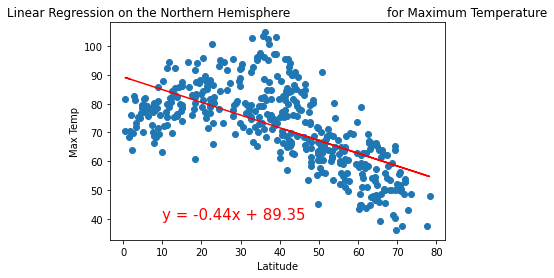

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

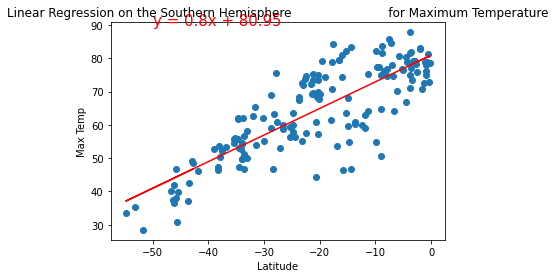

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

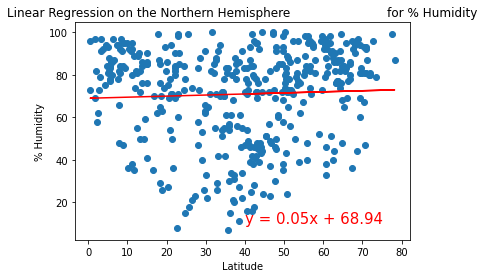

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

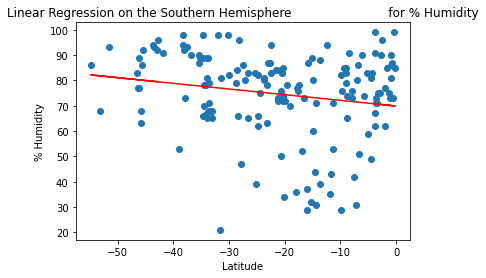

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

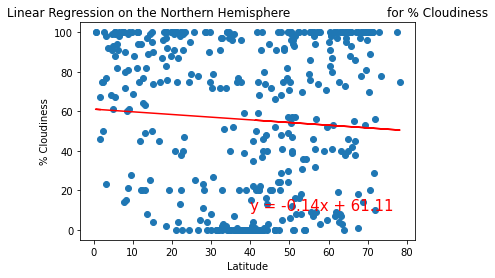

In [36]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

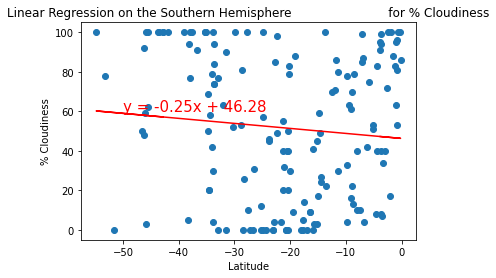

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

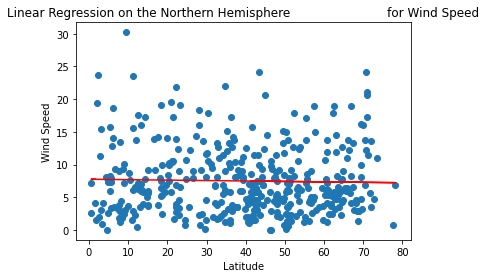

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

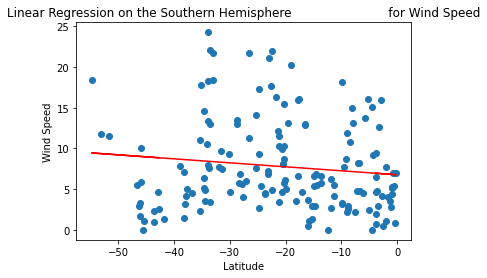

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))